#KNN
This notebook contains:
1. Iris (classifier)
2. Persian Banking Cards' Digits (classifier)
3. Advertising (Regressor)

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

* k-NN is used for classification or regression.
* In k-NN **classification**, the output is a class membership. An object is classified by a *plurality vote* of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
* In k-NN **regression**, the output is the property value for the object. This value is the *average* of the values of k nearest neighbors.

##Dimension reduction
For high-dimensional data (e.g., with number of dimensions more than 10) dimension reduction is usually performed prior to applying the k-NN algorithm in order to avoid the effects of the curse of dimensionality.

The curse of dimensionality in the k-NN context basically means that Euclidean distance is unhelpful in high dimensions because all vectors are almost equidistant to the search query vector

In [ ]:
import os #operation system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

In [ ]:
#Download data
!gdown --id 1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 19.7MB/s]


In [ ]:
#read csv file
df = pd.read_csv('Iris.csv')

In [ ]:
#check how data looks
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145,6.7,3.3,5.7,2.5,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica
7,8,5.0,3.4,1.5,0.2,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#change the target to categorical
target = df['Species'].astype('category')

In [ ]:
type(target)

pandas.core.series.Series

In [ ]:
target = target.cat.codes

In [ ]:
#drop the extra columns
data = df.drop(columns=['Id', 'Species'], axis=1)

In [ ]:
#check again the feature table
data.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

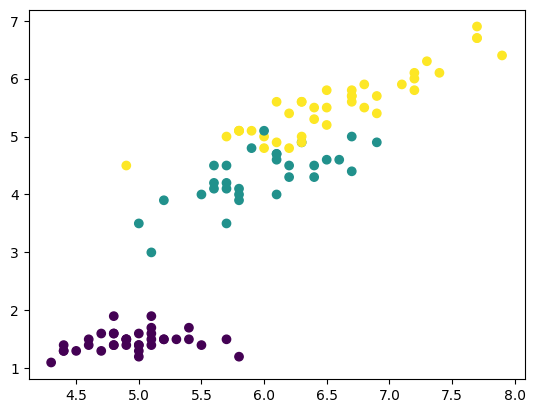

In [ ]:
#plot a simple look of the data's distribution with two features
plt.scatter(X_train['SepalLengthCm'], X_train['PetalLengthCm'], c=y_train.values)

In [ ]:
#define KNN function
def KNN(X_train, y_train, x_test, K=1):
  dist = np.linalg.norm(X_train.values - x_test, ord=2, axis=1)
  sorted_arg_dist = np.argsort(dist)
  y_nn = y_train.values[sorted_arg_dist[:K]]

  return mode(y_nn)[0]

In [ ]:
#prediction phase
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
  y_pred[i] = KNN(X_train, y_train, X_test.values[i], K=5)

In [ ]:
#evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
#applying built-in function / p is related Minkowski metric
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', p=2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [ ]:
y_pred2 = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#Image Classification with KNN

In [ ]:
!pwd #print work directory

/content


In [ ]:
!ls #list

Iris.csv  persian.zip  sample_data


In [ ]:
!unzip persian.zip

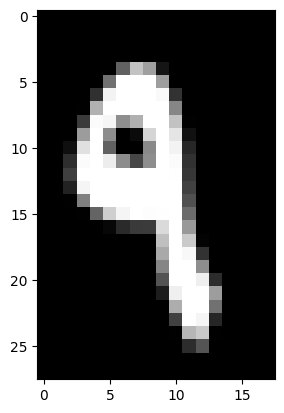

In [ ]:
Im_flat = np.zeros((989, 28*18))
cnt = 0
target = np.zeros((989))
for i in range(10):
  ls = os.listdir(str(i) + 'p')

  for image_path in ls:
    Im = plt.imread(str(i) + 'p/' + image_path)
    Im_flat[cnt,:] = Im.reshape(-1) #flatten
    target[cnt] = i
    cnt += 1

plt.imshow(Im, cmap='gray') #showing an image

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Im_flat, target, test_size=0.2)

In [ ]:
knn_image = KNeighborsClassifier(n_neighbors=5, algorithm='brute', p=2)

In [ ]:
knn_image.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [ ]:
y_pred3 = knn_image.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        22
         2.0       0.83      0.80      0.82        25
         3.0       0.81      0.94      0.87        18
         4.0       1.00      0.62      0.76        13
         5.0       1.00      1.00      1.00        18
         6.0       0.96      1.00      0.98        22
         7.0       0.91      1.00      0.95        20
         8.0       1.00      1.00      1.00        18
         9.0       1.00      1.00      1.00        19

    accuracy                           0.94       198
   macro avg       0.95      0.94      0.94       198
weighted avg       0.95      0.94      0.94       198



#Evaluation

In [ ]:
neighbors = np.arange(2,11)
mindowsky = [1, 2, np.inf]
for j in mindowsky:
  print('p is ', j, '\n -------------------------')
  for k in neighbors:
    kkn_val = KNeighborsClassifier(n_neighbors=k, p=j)
    scores = cross_val_score(kkn_val, X_train, y_train,
                            cv=5, scoring='accuracy')
    print('for k = ', k, 'acc is ', scores, 'mean_acc is ', scores.mean())

p is  1 
 -------------------------
for k =  2 acc is  [0.86792453 0.88607595 0.86075949 0.93037975 0.87974684] mean_acc is  0.8849773107236686
for k =  3 acc is  [0.88679245 0.91139241 0.86075949 0.93037975 0.88607595] mean_acc is  0.8950800095533795
for k =  4 acc is  [0.88050314 0.89240506 0.87341772 0.89873418 0.86075949] mean_acc is  0.8811639200700581
for k =  5 acc is  [0.86792453 0.86708861 0.86708861 0.93037975 0.87341772] mean_acc is  0.8811798423692381
for k =  6 acc is  [0.83647799 0.86708861 0.84810127 0.90506329 0.86708861] mean_acc is  0.8647639519146564
for k =  7 acc is  [0.8427673  0.86708861 0.84810127 0.90506329 0.87341772] mean_acc is  0.8672876363346868
for k =  8 acc is  [0.82389937 0.82911392 0.84177215 0.89873418 0.84810127] mean_acc is  0.8483241780113048
for k =  9 acc is  [0.82389937 0.85443038 0.83544304 0.91139241 0.84810127] mean_acc is  0.8546532919353554
for k =  10 acc is  [0.79874214 0.81012658 0.8164557  0.87974684 0.8164557 ] mean_acc is  0.82430538

##Advertising (Regression with KNN)

Dataset: https://www.kaggle.com/datasets/ishaanv/ISLR-Auto

In [ ]:
!gdown --id 1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 16.5MB/s]


In [ ]:
df = pd.read_csv('Advertising.csv')
df.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [ ]:
df.shape

(200, 5)

Text(0.5, 1.0, 'Scatter Plot')

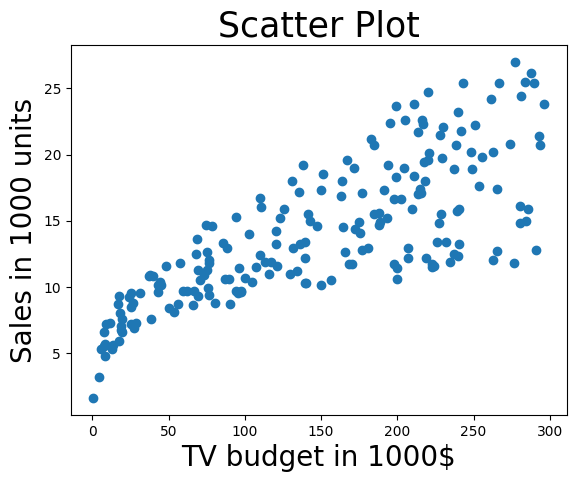

In [ ]:
# Select variables and draw a scatter Plot
x = df[['TV']].values # predictor
y = df['Sales'].values #response or output variable

plt.scatter(x, y)
plt.xlabel('TV budget in 1000$' ,fontsize=20)
plt.ylabel('Sales in 1000 units',fontsize=20)
plt.title('Scatter Plot',fontsize=25)

In [ ]:
#Split Data set
x = df[['TV', 'Radio', 'Newspaper']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Text(0.5, 1.0, 'ELBOW PLOT')

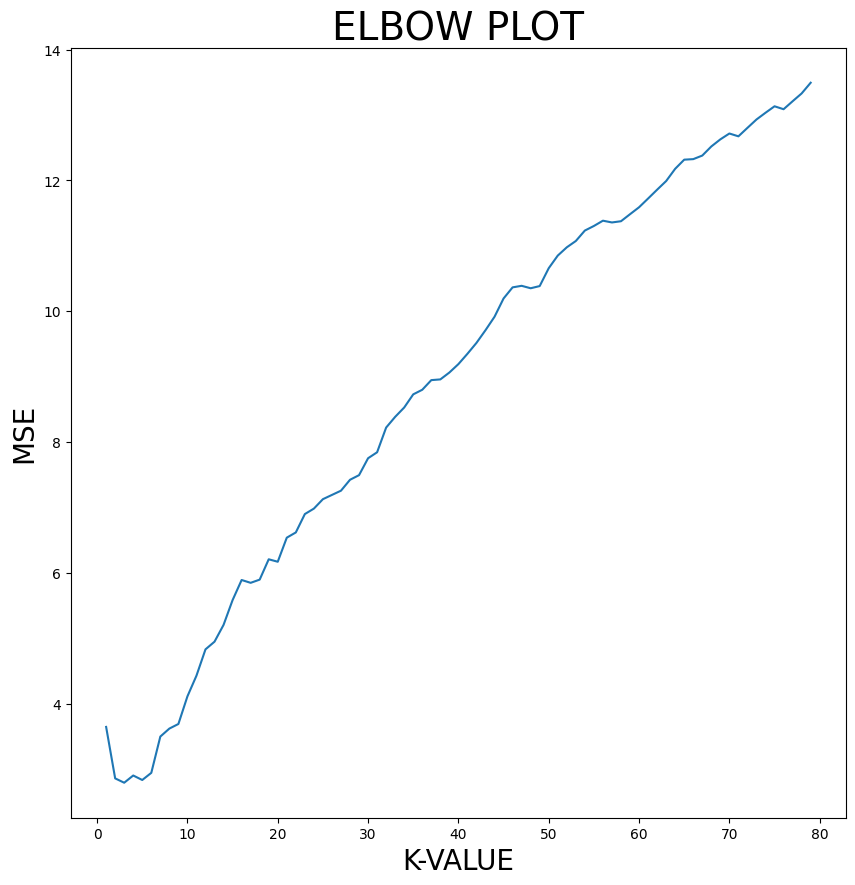

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
k_list = np.arange(1,80,1)
knn_dict = {} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(x_train, y_train)
    y_knn_pred = model_knn.predict(x_test)
#Storing MSE
    mse = mean_squared_error(y_test,y_knn_pred)
    knn_dict[i] = mse
#Plotting the results
ax.plot(np.array(list(knn_dict.keys())).astype(float), np.array(list(knn_dict.values())).astype(float))
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_title('ELBOW PLOT', fontsize=28)

In [ ]:
mean_squared_error(y_test, y_knn_pred)

13.49479359611173

In [ ]:
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
model_knn = knn.fit(x_train, y_train)
y_knn_pred = model_knn.predict(x_test)

In [ ]:
r2_score(y_test, y_knn_pred)

0.8961387664800297